In [1]:
%cd ..
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # use cpu because I'm training on gpu

# from thumbs.experiments.pokemjon_big_both import PokemonExperiment
from thumbs.experiments.pokemon_conditional_types_v4_deep import PokemonExperiment
from thumbs.train import load_weights
from thumbs.viz import show_samples, visualize_preprocessed_image
from thumbs.data import load_and_preprocess_image
import tensorflow as  tf
import numpy as np
import matplotlib.pyplot as plt



/home/anthony/workspace/yt-data


/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Images in /home/anthony/workspace/yt-data/data/pokemon
['282-mega.jpg', '582.jpg', '340.jpg', '570.jpg', '136.jpg', '531-mega.jpg', '335.jpg', '96.jpg', '581.jpg', '153.jpg']
Found 821 total files
Found 819 jpgs


  0%|          | 0/819 [00:00<?, ?it/s]

  0%|          | 0/819 [00:00<?, ?it/s]

  0%|          | 0/819 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

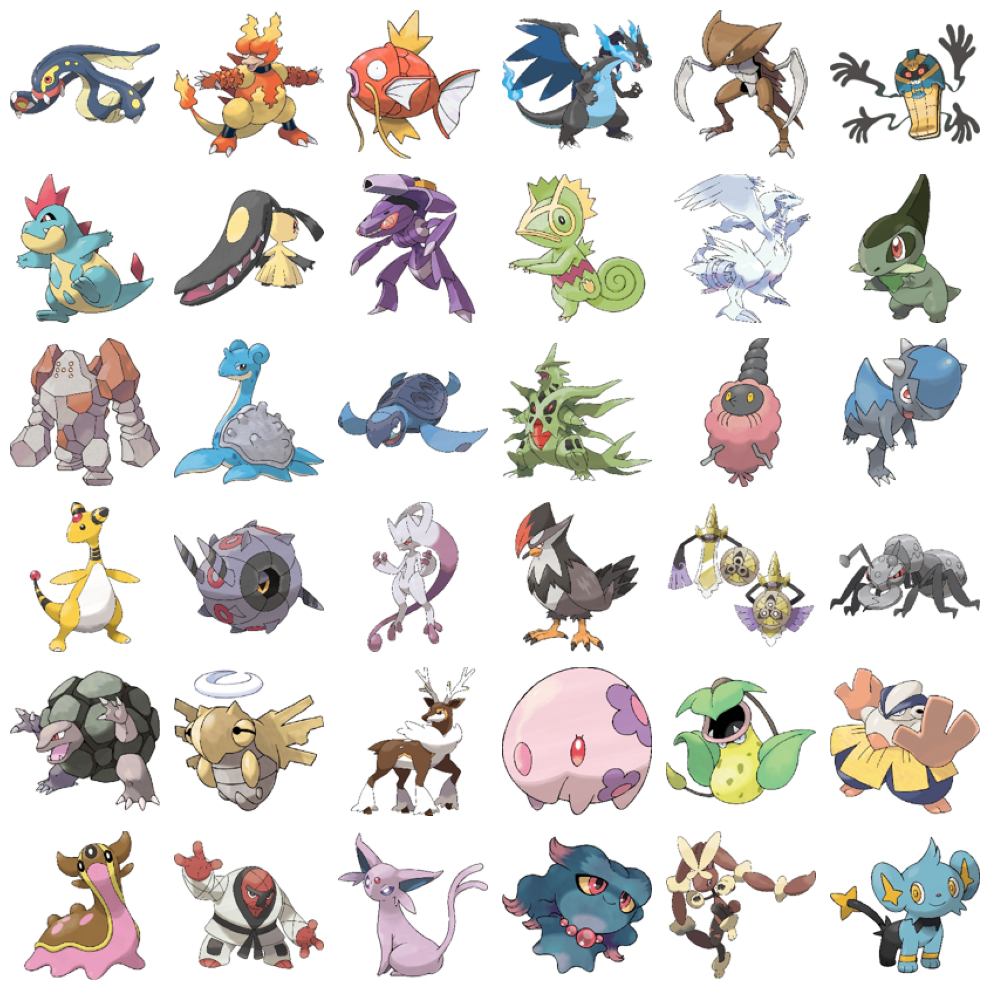

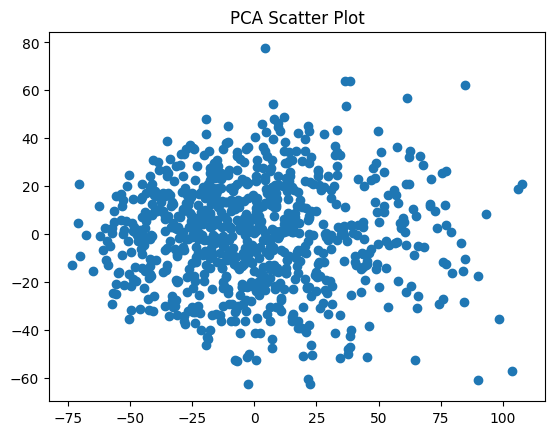

2023-08-26 11:26:03.299377: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "discriminator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                               Output Shape                                                Param #             Connected to                                                
 type1 (InputLayer)                                         [(None,)]                                                   0                   []                                                          
                                                                                                                                                                                                        
 type2 (InputLayer)                                         [(None,)]                                                   0                   []                               

In [2]:
exp = PokemonExperiment()
mparams = exp.get_mutable_params()
model = exp.get_model(mparams[0])
m = model.build()
train = exp.get_train(m, mparams[0])

In [3]:
load_weights(m.generator, exp.get_params().gen_weight_path)
load_weights(m.discriminator, exp.get_params().dis_weight_path)

Loaded previous weights
Loaded previous weights


# Make a fake pokemon and judge it

<Figure size 640x480 with 0 Axes>

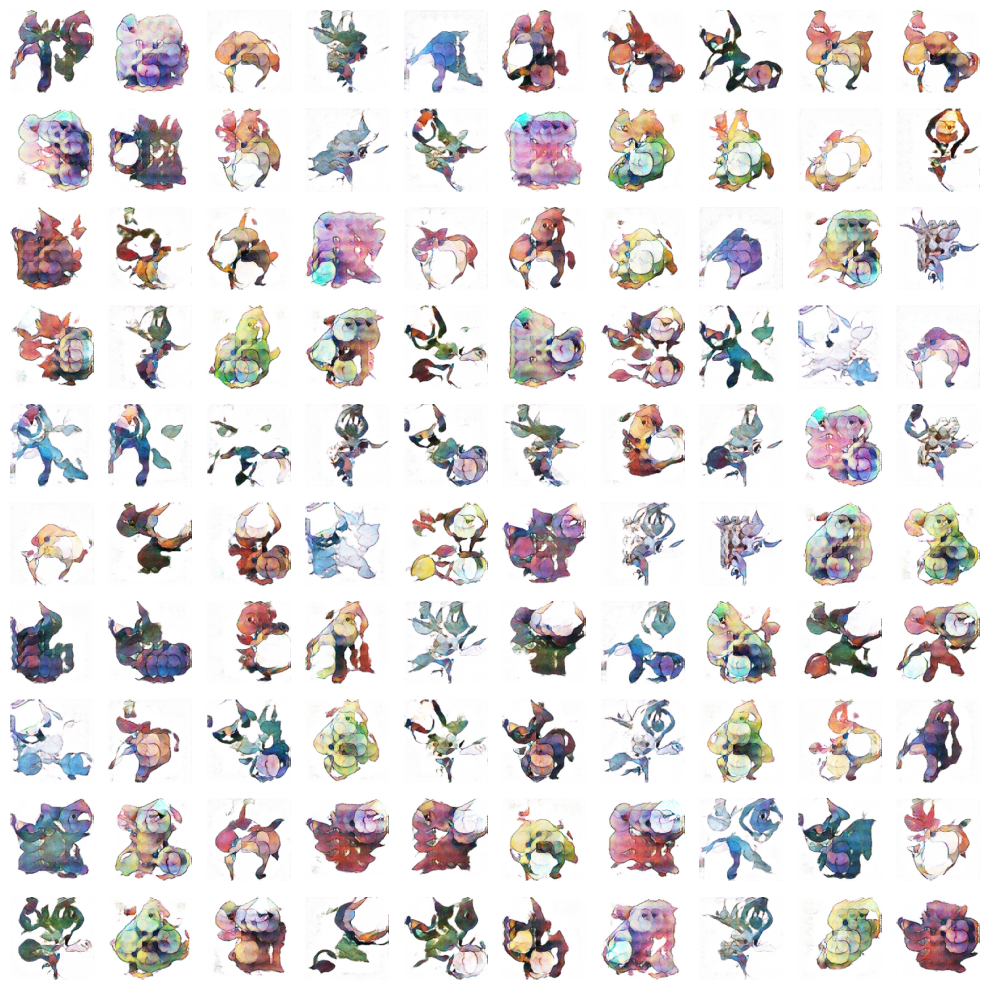

In [8]:
from typing import Tuple

def get_labels(n: int) -> Tuple[np.ndarray, np.ndarray]:
    return (
        np.asarray([['[UNK]']for _ in range(n)]),
        np.asarray([['[UNK]']for _ in range(n)]),
    )

train.label_getter = get_labels
train.show_samples(rows=8, cols=8)

1/1 [==============================] - 0s 33ms/step


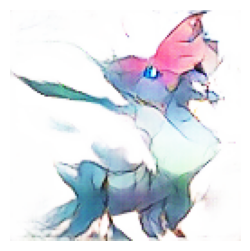

1/1 [==============================] - 0s 122ms/step
[[40.62247]]
1/1 [==============================] - 0s 23ms/step
[[47.94337]]


In [ ]:
bug_label = np.expand_dims(np.array(exp.lookup(['bug'])), axis=0)
flying_ice_label = np.expand_dims(np.array(exp.lookup(['flying', 'ice'])), axis=0)
noise = np.random.normal(0, 1, (1, 100))
generated_thumbnails = m.generator.predict([noise, flying_ice_label])
visualize_preprocessed_image(generated_thumbnails[0], (3,3))
print(m.discriminator.predict([generated_thumbnails, flying_ice_label]))
print(m.discriminator.predict([generated_thumbnails, bug_label])) # See if it can tell the difference between bug and flying/ice


# Determine attribution

In [ ]:

# Define a function to compute the attribution maps using Gradient*Input method
def compute_attribution_map(image: np.ndarray):
    image = tf.convert_to_tensor(image)
    with tf.GradientTape() as tape:
        tape.watch(image)
        output = m.discriminator(image)
    
    gradients = tape.gradient(output, image)
    attribution_map = gradients * image
    
    return attribution_map

def show_attribution(input_image):
    preprocessed_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

    # Compute the attribution map for the input image
    attribution_map = compute_attribution_map(preprocessed_image)
    # Convert the attribution map to a grayscale image
    attribution_map = np.mean(attribution_map, axis=-1, keepdims=True)

    # Normalize the attribution map to [0, 1]
    attribution_map -= np.min(attribution_map)
    attribution_map /= np.max(attribution_map)

    # Resize the attribution map to the original image size for visualization
    attribution_map = tf.image.resize(attribution_map, size=(128, 128)).numpy()


    # Convert them back to 0,255. The pokemon images look better that way, just keep
    # the attribution map consistent
    input_image = ((input_image + 1) * 127.5).astype(np.uint8)


    # Display the original image and the attribution map
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(input_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(attribution_map.squeeze(axis=0), cmap='bwr')
    axes[1].set_title('Attribution Map')
    axes[1].axis('off')
    plt.show()


In [8]:

show_attribution(generated_thumbnails[0])

ValueError: Layer "discriminator" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor: shape=(1, 128, 128, 3), dtype=float32, numpy=
array([[[[0.93774956, 0.91528004, 0.9242926 ],
         [0.98770297, 0.98176205, 0.9827059 ],
         [0.9926631 , 0.9872944 , 0.9904306 ],
         ...,
         [0.9994281 , 0.99891925, 0.9989995 ],
         [0.9983724 , 0.99697256, 0.99755245],
         [0.98739886, 0.98170936, 0.98115724]],

        [[0.9815311 , 0.9795661 , 0.976099  ],
         [0.99724644, 0.99534214, 0.99686414],
         [0.9987992 , 0.99848425, 0.9982245 ],
         ...,
         [0.99997854, 0.9999519 , 0.9999684 ],
         [0.9998963 , 0.999835  , 0.99984354],
         [0.99875784, 0.99753284, 0.9984679 ]],

        [[0.986452  , 0.9839699 , 0.9863012 ],
         [0.9968299 , 0.9950745 , 0.9966266 ],
         [0.99855775, 0.9982048 , 0.99875945],
         ...,
         [0.99999374, 0.9999822 , 0.9999871 ],
         [0.99998623, 0.9999743 , 0.99997765],
         [0.99985456, 0.99967337, 0.9997406 ]],

        ...,

        [[0.9823838 , 0.97807336, 0.9800843 ],
         [0.9926908 , 0.99269706, 0.9923131 ],
         [0.99406946, 0.99207354, 0.9936593 ],
         ...,
         [0.9884321 , 0.97942275, 0.9746659 ],
         [0.98523784, 0.9747806 , 0.96588296],
         [0.95635337, 0.9234142 , 0.9182002 ]],

        [[0.96946514, 0.9662215 , 0.96869206],
         [0.98798054, 0.9841936 , 0.9869192 ],
         [0.99249816, 0.9908563 , 0.99208313],
         ...,
         [0.99333394, 0.98539484, 0.9842572 ],
         [0.98637444, 0.9742985 , 0.9606727 ],
         [0.9654819 , 0.93525153, 0.9198029 ]],

        [[0.92379975, 0.92125475, 0.925194  ],
         [0.9624892 , 0.96478176, 0.9610579 ],
         [0.9770181 , 0.97328174, 0.97320074],
         ...,
         [0.98503554, 0.9716908 , 0.96814084],
         [0.96507215, 0.9358912 , 0.9283705 ],
         [0.91868764, 0.86748415, 0.8219442 ]]]], dtype=float32)>]

### Sanity check against an absurd image

1/1 [==============================] - 0s 26ms/step
[[-13.387986]]


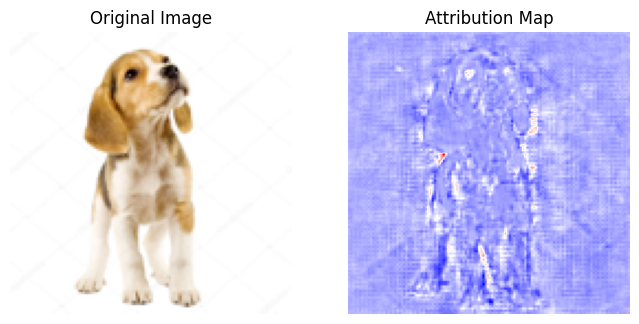

In [ ]:
# load 
egg_jpg = '/home/anthony/windows/Downloads/dog_white.jpg'
egg = load_and_preprocess_image(egg_jpg, (128, 128, 3))

print(m.discriminator.predict(np.expand_dims(egg, axis=0)))
show_attribution(egg)

# Judge a real pokemon

In [ ]:
from thumbs.data import get_pokemon_data256
images = get_pokemon_data256(exp.get_params().img_shape)
images.shape

ModuleNotFoundError: No module named 'thumbs'

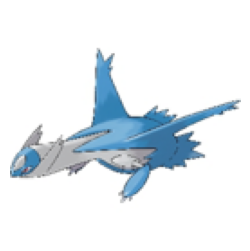

1/1 [==============================] - 0s 25ms/step
[[-5.0586567]]


In [ ]:
real_pokemon = images[np.random.randint(0, images.shape[0], 1)]
visualize_preprocessed_image(real_pokemon[0], (3,3))

print(m.discriminator.predict(real_pokemon))



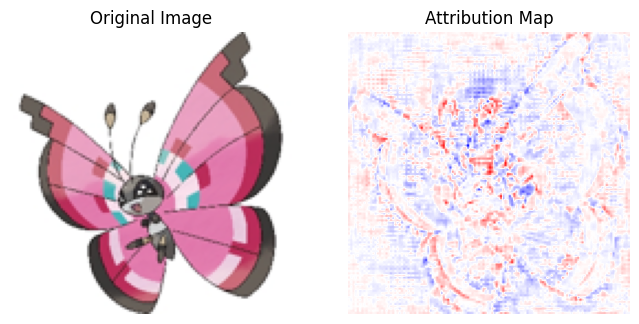

In [ ]:

show_attribution(real_pokemon[0])

In [ ]:

# Mean of the entire real set
print(np.mean(m.discriminator.predict(images)))

26/26 [==============================] - 2s 64ms/step
3.6592631


# Inspect hidden layer output

Layer 1 of 6, shape (None, 6, 6, 256), name conv2d_transpose/BiasAdd:0


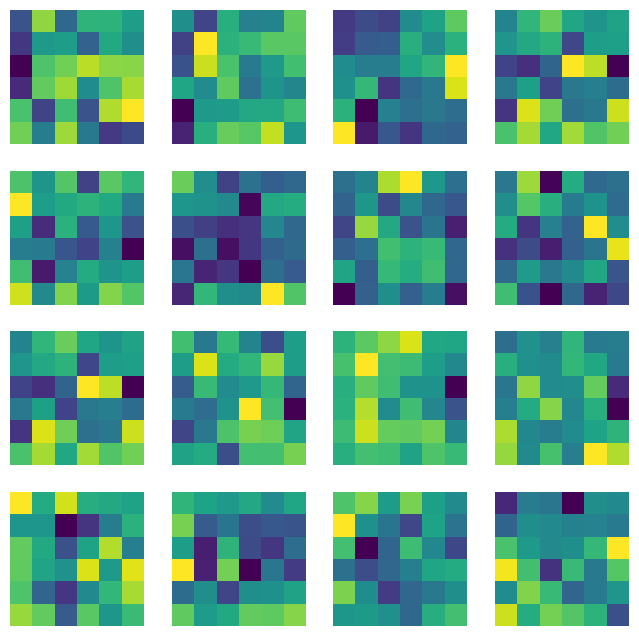

Layer 2 of 6, shape (None, 30, 30, 192), name conv2d_transpose_1/BiasAdd:0


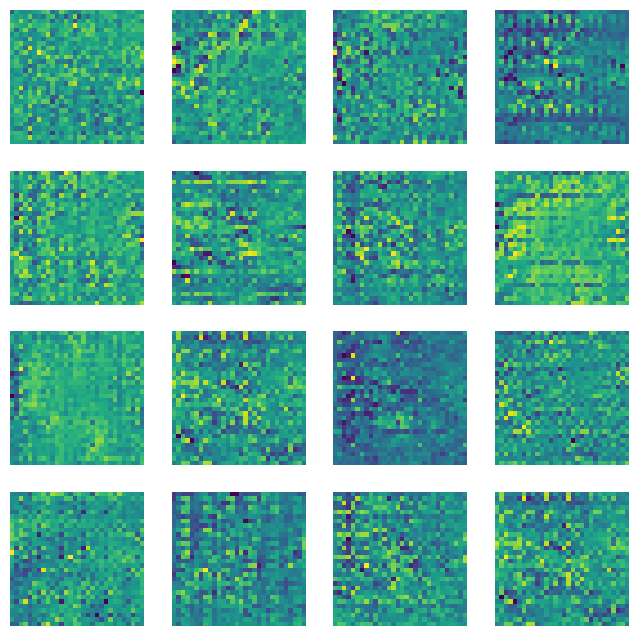

Layer 3 of 6, shape (None, 63, 63, 128), name conv2d_transpose_2/BiasAdd:0


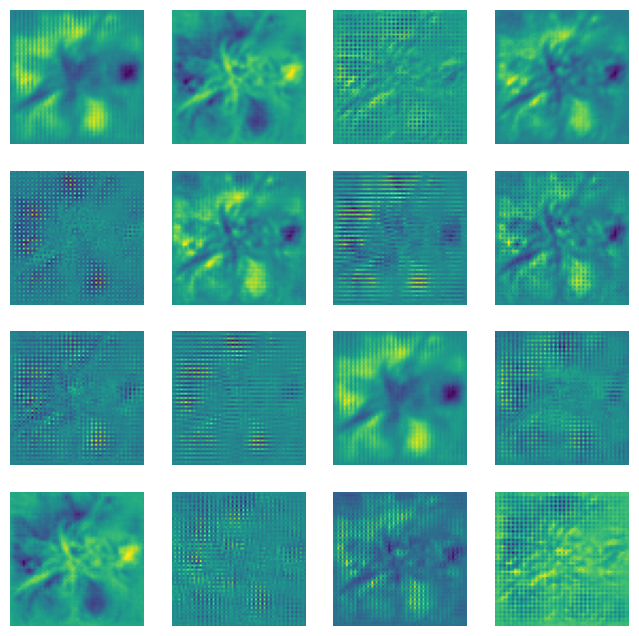

Layer 4 of 6, shape (None, 64, 64, 64), name conv2d_transpose_3/BiasAdd:0


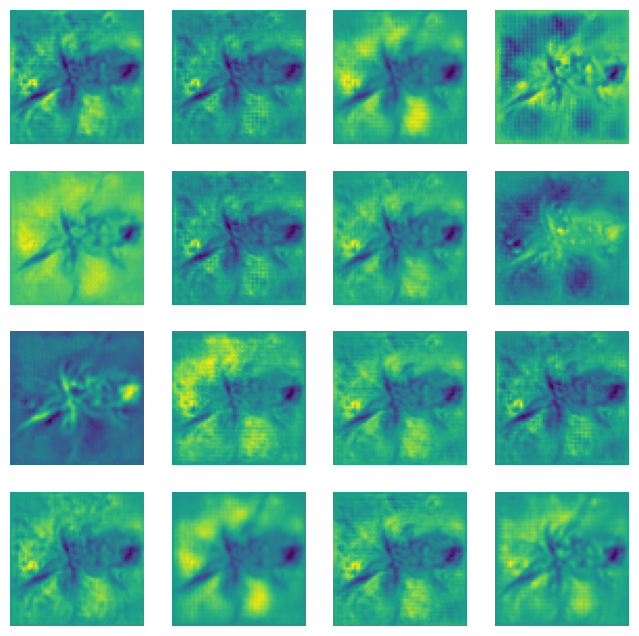

Layer 5 of 6, shape (None, 128, 128, 3), name conv2d_transpose_4/BiasAdd:0


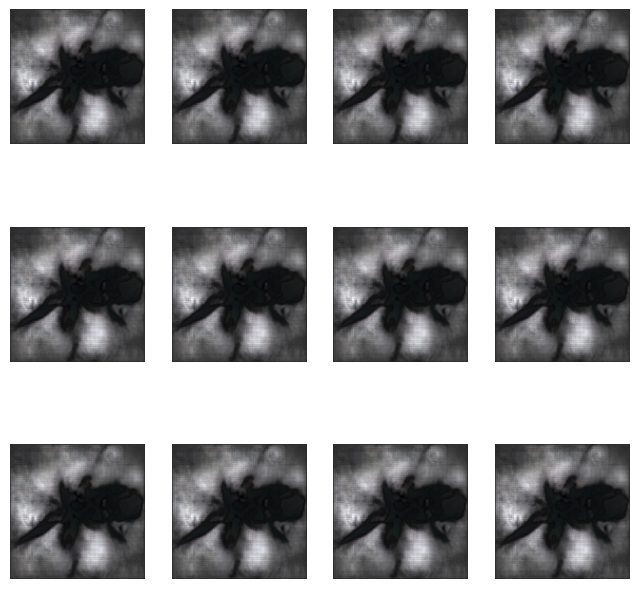

Layer 6 of 6, shape (None, 128, 128, 3), name activation/Tanh:0


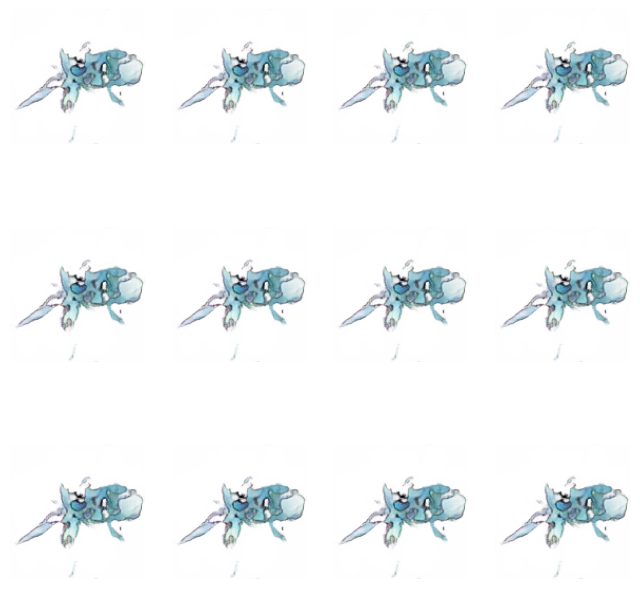

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def get_intermediate_models(model):
    intermediate_models = []
    # layers_to_get = [2,5,8,11, 12]
    for i in range(len(model.layers)):
        # only pick models that have conv2d_transpose_1 or tanh in the name
        if 'conv2d_transpose' in model.layers[i].output.name.lower() or 'tanh' in model.layers[i].output.name.lower():
            print(model.layers[i])
            intermediate_model = Model(inputs=model.input, outputs=model.layers[i].output)
            intermediate_models.append(intermediate_model)
    return intermediate_models


generator = m.generator
intermediate_models = get_intermediate_models(generator)
noise = np.random.normal(0, 1, (1, 100))
for i, intermediate_model in enumerate(intermediate_models):
    print(f'Layer {i+1} of {len(intermediate_models)}, shape {intermediate_model.output_shape}, name {intermediate_model.output.name}')
    intermediate_output = intermediate_model.predict(noise, verbose=0)

    intermediate_output = intermediate_output[0]
    # n = 64
    # intermediate_output = intermediate_output[:, :, :n]

    intermediate_output -= intermediate_output.min() # Make the minimum 0
    intermediate_output /= intermediate_output.max() # Make the maximum 1

    n_cols = 4
    n_channels = min(n_cols, intermediate_output.shape[2])
    fig, axs = plt.subplots(n_channels , n_cols, figsize=(8, 8))
    for i in range(n_channels):
        for j in range(n_cols):
            if n_channels == 3:
                axs[i][j].imshow(intermediate_output)
            else:
                axs[i][j].imshow(intermediate_output[:, :, np.random.randint(0, intermediate_output.shape[2])])
            axs[i][j].axis('off')

    plt.show()

